In [15]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

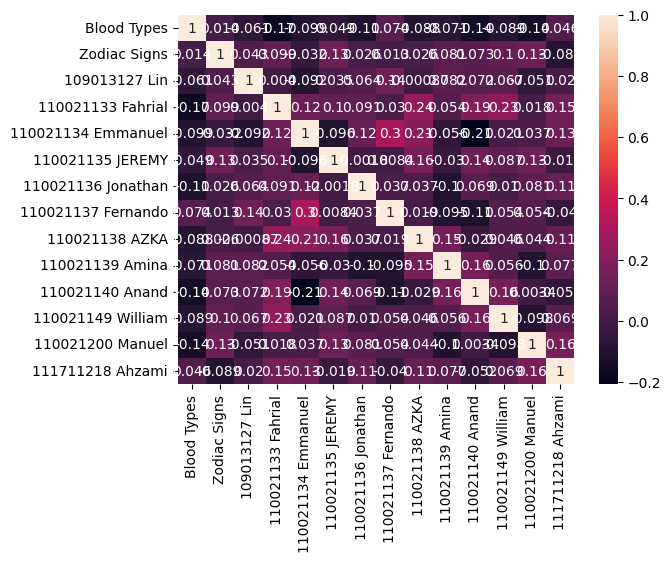

In [16]:
import seaborn as sns

# Load the data
data = pd.read_csv("preprocessed.csv")

# Preprocess the data
le = LabelEncoder()
data["Blood Types"] = le.fit_transform(data["Blood Types"])
data["Zodiac Signs"] = le.fit_transform(data["Zodiac Signs"])
data.replace({"N": 1, "D": 0, "A": 2}, inplace=True)

# Plot the correlation matrix
sns.heatmap(data.corr(), annot=True)

Accuracy score for XGBoost classifier: 21.88%
Accuracy score for Decision Tree classifier: 28.12%
Accuracy score for Random Forest classifier: 25.00%


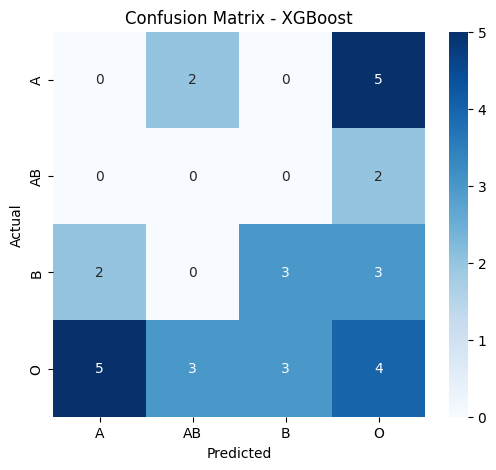

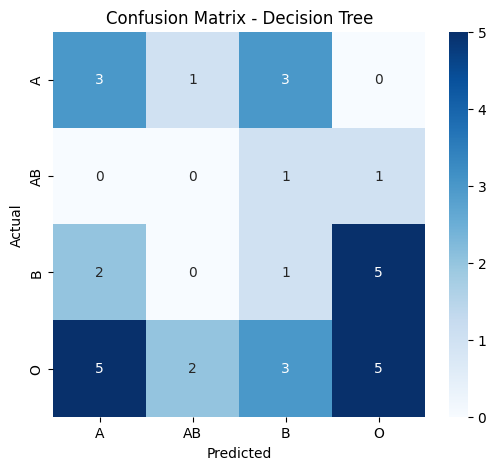

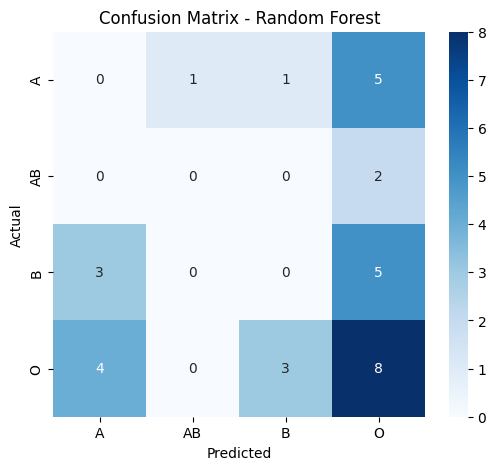

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
data = pd.read_csv('preprocessed.csv')

# Encode categorical variables
le_bt = LabelEncoder()
le_zs = LabelEncoder()
data['Blood Types'] = le_bt.fit_transform(data['Blood Types'])
data['Zodiac Signs'] = le_zs.fit_transform(data['Zodiac Signs'])

# Convert string values to numeric
data = data.replace({'N': 1, 'D': 0, 'A': 2})

# Split data into training and testing subsets
X = data.drop('Blood Types', axis=1)
y = data['Blood Types']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Train Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict blood types using XGBoost classifier
y_pred_xgb = xgb_clf.predict(X_test)

# Predict blood types using Decision Tree classifier
y_pred_dt = dt_clf.predict(X_test)

# Predict blood types using Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)

# Compute confusion matrix for XGBoost classifier
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Compute confusion matrix for Decision Tree classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Compute confusion matrix for Random Forest classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Compute accuracy score for XGBoost classifier
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy score for XGBoost classifier: {:.2f}%".format(acc_xgb*100))

# Compute accuracy score for Decision Tree classifier
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy score for Decision Tree classifier: {:.2f}%".format(acc_dt*100))

# Compute accuracy score for Random Forest classifier
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score for Random Forest classifier: {:.2f}%".format(acc_rf*100))

# Compute correlation matrix for all features
corr_matrix = data.corr()

# Plot confusion matrix for XGBoost classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g', xticklabels=le_bt.classes_, yticklabels=le_bt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Plot confusion matrix for Decision Tree classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', xticklabels=le_bt.classes_, yticklabels=le_bt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=le_bt.classes_, yticklabels=le_bt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [13]:
#Hyperparameter
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.3],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Create XGBoost classifier object
xgb_clf = XGBClassifier(random_state=42)

# Use GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(xgb_clf, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Training set accuracy: ", grid_search.best_score_)
print("Test set accuracy: ", grid_search.score(X_test, y_test))

Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Training set accuracy:  0.34400000000000003
Test set accuracy:  0.21875


In [ ]:
############################
###-----EXPERIMENTAL-----###
############################










0




############################
###-----EXPERIMENTAL-----###
############################

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the data
data = pd.read_csv("preprocessed.csv")

# Preprocess the data
le = LabelEncoder()
data["Blood Types"] = le.fit_transform(data["Blood Types"])
data["Zodiac Signs"] = le.fit_transform(data["Zodiac Signs"])
data.replace({"N": 1, "D": 0, "A": 2}, inplace=True)

# Split the dataset
X = data.drop("Blood Types", axis=1)
y = data["Blood Types"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the models
models = {"XGBoost": XGBClassifier(), "Random Forest": RandomForestClassifier(), "Decision Tree": DecisionTreeClassifier()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the models
    print(name)
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy score:", accuracy_score(y_test, y_pred))

XGBoost
Confusion matrix:
[[0 2 0 5]
 [0 0 0 2]
 [2 0 3 3]
 [5 3 3 4]]
Accuracy score: 0.21875
Random Forest
Confusion matrix:
[[0 0 1 6]
 [1 0 0 1]
 [4 0 1 3]
 [4 0 3 8]]
Accuracy score: 0.28125
Decision Tree
Confusion matrix:
[[3 1 3 0]
 [1 0 0 1]
 [3 0 2 3]
 [3 2 5 5]]
Accuracy score: 0.3125


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt


# Load data from CSV file
data = pd.read_csv('preprocessed.csv')

# Encode categorical variables
data = pd.get_dummies(data, columns=['Blood Types', 'Zodiac Signs'])

# Convert string values to numeric
data = data.replace({'N': 1, 'D': 0, 'A': 2})

# Split data into training and testing subsets
X = data.drop('Blood Types', axis=1)
y = data['Blood Types']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Train random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Evaluate performance on testing dataset
models = [('Decision Tree', dtc), ('Random Forest', rfc), ('XGBoost', xgb_clf)]
for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{name} Classifier:')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}\n')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['O', 'A', 'B', 'AB'])
    disp.ax_.set_title(f'{name} Classifier - Confusion Matrix')
    plt.show()
    
    # Correlation matrix
    corr = np.corrcoef(X_train.T)
    sns.set(font_scale=1)
    hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                     yticklabels=X_train.columns, xticklabels=X_train.columns)
    hm.set_title(f'{name} Classifier - Correlation Matrix')
    plt.show()

ImportError: ignored

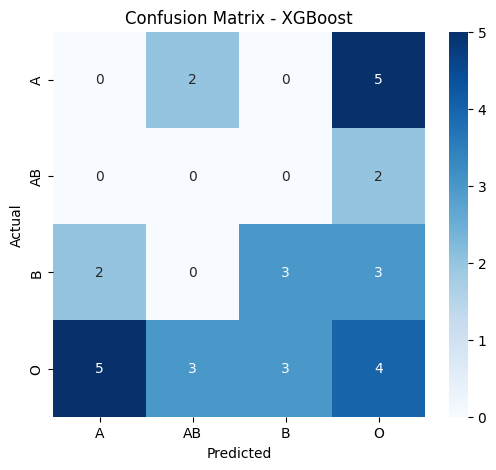

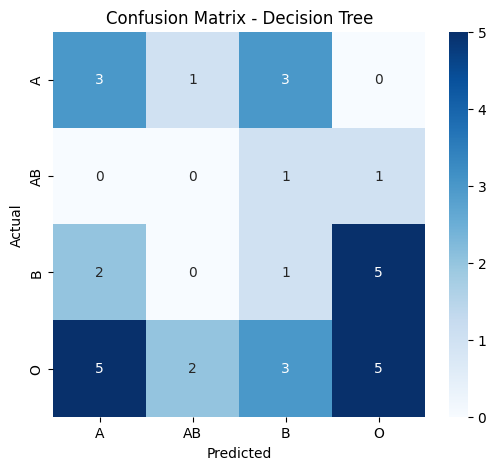

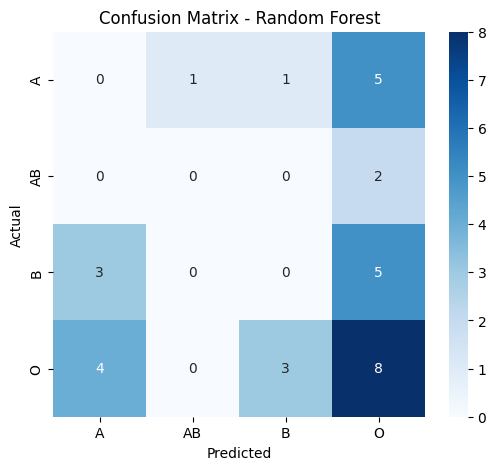

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
data = pd.read_csv('preprocessed.csv')

# Encode categorical variables
le_bt = LabelEncoder()
le_zs = LabelEncoder()
data['Blood Types'] = le_bt.fit_transform(data['Blood Types'])
data['Zodiac Signs'] = le_zs.fit_transform(data['Zodiac Signs'])

# Convert string values to numeric
data = data.replace({'N': 1, 'D': 0, 'A': 2})

# Split data into training and testing subsets
X = data.drop('Blood Types', axis=1)
y = data['Blood Types']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Train Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict blood types using XGBoost classifier
y_pred_xgb = xgb_clf.predict(X_test)

# Predict blood types using Decision Tree classifier
y_pred_dt = dt_clf.predict(X_test)

# Predict blood types using Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)

# Compute confusion matrix for XGBoost classifier
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Compute confusion matrix for Decision Tree classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Compute confusion matrix for Random Forest classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Compute correlation matrix for all features
corr_matrix = data.corr()

# Plot confusion matrix for XGBoost classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g', xticklabels=le_bt.classes_, yticklabels=le_bt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Plot confusion matrix for Decision Tree classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g', xticklabels=le_bt.classes_, yticklabels=le_bt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Plot confusion matrix for Random Forest classifier
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=le_bt.classes_, yticklabels=le_bt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load data from CSV file
data = pd.read_csv('your_data.csv')

# Encode categorical variables
data = pd.get_dummies(data, columns=['Blood Types', 'Zodiac Signs'])

# Convert string values to numeric
data = data.replace({'N': 1, 'D': 0, 'A': 2})

# Split data into training and testing subsets
X = data.drop('Blood Types', axis=1)
y = data['Blood Types']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate performance on testing dataset
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)